# Breast Cancer
1) 차원축소 : 2, 5, 10  
2) 분류 정확도 : 원본, 2, 5, 10  
3) 2차원은 시각화  
4) 군집화(K-Means)  
5) 평가(실루엣분석)  

In [53]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Pretendard-sb'

In [12]:
bc = load_breast_cancer()
bc_std = StandardScaler().fit_transform(bc.data)
print(dict.keys(bc))
bc_std

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

---
> 2, 5, 10 차원으로 차원축소

In [22]:
pca_2d = PCA(n_components=2)
pca_5d = PCA(n_components=5)
pca_10d = PCA(n_components=10)
bc_pca_2d = pca_2d.fit_transform(bc_std)
bc_pca_5d = pca_5d.fit_transform(bc_std)
bc_pca_10d = pca_10d.fit_transform(bc_std)

---
> 분류정확도

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [25]:
pca_10d.explained_variance_ratio_, pca_5d.explained_variance_ratio_, pca_2d.explained_variance_ratio_

(array([0.44272026, 0.18971182, 0.09393163, 0.06602135, 0.05495768,
        0.04024522, 0.02250734, 0.01588724, 0.01389649, 0.01168978]),
 array([0.44272026, 0.18971182, 0.09393163, 0.06602135, 0.05495768]),
 array([0.44272026, 0.18971182]))

In [77]:
# 정규화한 원본
X_train, X_test, y_train, y_test = train_test_split(
    bc_std, bc.target, stratify=bc.target, random_state=2021
)
rfc = RandomForestClassifier(random_state=2021)
rfc.fit(X_train, y_train)
rfc.score(X_test, y_test)

0.9790209790209791

In [78]:
def pca_accuracy(X,y):
    X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, random_state=2021
    )
    rfc = RandomForestClassifier(random_state=2021)
    rfc.fit(X_train, y_train)
    score = rfc.score(X_test, y_test)
    return np.round(score, 4)

In [79]:
print('PCA 2 정확도:', pca_accuracy(bc_pca_2d, bc.target))
print('PCA 5 정확도:', pca_accuracy(bc_pca_5d, bc.target))
print('PCA 10 정확도:', pca_accuracy(bc_pca_10d, bc.target))
print('원데이터 정확도:', pca_accuracy(bc_std, bc.target))

PCA 2 정확도: 0.9441
PCA 5 정확도: 0.965
PCA 10 정확도: 0.972
원데이터 정확도: 0.979


>globals() : 전역 변수를 딕셔너리에 담아두기

In [81]:
for dim in [2,5,10]:
    globals()[f'pca{dim}'] = PCA(n_components=dim)
    globals()[f'bc_{dim}d'] = globals()[f'pca{dim}'].fit_transform(bc_std)
    acc = pca_accuracy(globals()[f'bc_{dim}d'], bc.target)
    print(f'PCA {dim} 정확도:{acc}')
print('원데이터 정확도:', pca_accuracy(bc_std, bc.target))

PCA 2 정확도:0.9441
PCA 5 정확도:0.965
PCA 10 정확도:0.972
원데이터 정확도: 0.979


In [82]:
for dim in [2,5,10]:
    locals()[f'pca{dim}'] = PCA(n_components=dim)
    locals()[f'bc_{dim}d'] = locals()[f'pca{dim}'].fit_transform(bc_std)
    acc = pca_accuracy(locals()[f'bc_{dim}d'], bc.target)
    print(f'PCA {dim} 정확도:{acc}')
print('원데이터 정확도:', pca_accuracy(bc_std, bc.target))

PCA 2 정확도:0.9441
PCA 5 정확도:0.965
PCA 10 정확도:0.972
원데이터 정확도: 0.979


> locals()는 현재 local변수들을 딕셔너리형태로 return,  
> globals()는 현재 global변수들을 딕셔너리형태로 return

In [88]:
dict.keys(locals())

dict_keys(['__name__', '__doc__', '__package__', '__loader__', '__spec__', '__builtin__', '__builtins__', '_ih', '_oh', '_dh', 'In', 'Out', 'get_ipython', 'exit', 'quit', '_', '__', '___', 'os', 'sys', '_i', '_ii', '_iii', '_i1', 'np', 'pd', 'plt', 'load_breast_cancer', 'PCA', 'StandardScaler', '_i2', 'bc', 'bc_std', '_i3', '_3', '_i4', '_4', '_i5', '_i6', '_6', '_i7', 'pca_2d', 'pca_5d', 'pca_10d', '_i8', 'RandomForestClassifier', 'train_test_split', '_i9', 'bc_pca_2d', 'bc_pca_5d', 'bc_pca_10d', '_i10', '_i11', '_i12', '_12', '_i13', '_i14', '_i15', '_i16', 'X_train', 'X_test', 'y_train', 'y_test', 'rfc', '_16', '_i17', '_17', '_i18', '_18', '_i19', '_19', '_i20', '_i21', '_i22', '_i23', '_i24', '_i25', '_25', '_i26', 'df', '_26', '_i27', 'markers', 'colors', 'edgec', 'fig', 'axs', 'k', 'column', 'ax', 'i', 'marker', '_i28', 'df_2d', '_i29', '_29', '_i30', '_30', '_i31', '_31', '_i32', '_32', '_i33', '_33', '_i34', 'KMeans', '_i35', '_35', '_i36', 'kmeans', '_i37', '_37', '_i38', '_3

In [19]:
# 10차원
X_train, X_test, y_train, y_test = train_test_split(
    bc_pca_10d, bc.target, stratify=bc.target, random_state=2021
)
rfc = RandomForestClassifier(random_state=2021)
rfc.fit(X_train, y_train)
rfc.score(X_test, y_test)

0.972027972027972

In [18]:
# 5차원
X_train, X_test, y_train, y_test = train_test_split(
    bc_pca_5d, bc.target, stratify=bc.target, random_state=2021
)
rfc = RandomForestClassifier(random_state=2021)
rfc.fit(X_train, y_train)
rfc.score(X_test, y_test)

0.965034965034965

In [17]:
# 2차원
X_train, X_test, y_train, y_test = train_test_split(
    bc_pca_2d, bc.target, stratify=bc.target, random_state=2021
)
rfc = RandomForestClassifier(random_state=2021)
rfc.fit(X_train, y_train)
rfc.score(X_test, y_test)

0.9440559440559441

In [33]:
df = pd.DataFrame(bc.data, columns=bc.feature_names)
df['PC1'] = bc_pca_2d[:,0]
df['PC2'] = bc_pca_2d[:,1]
df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,PC1,PC2
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,9.192837,1.948583
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,2.387802,-3.768172
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,5.733896,-1.075174


---
>군집화 : K-Means 모델 생성/학습

In [36]:
kmeans = KMeans(n_clusters=2, random_state=2021)

In [37]:
kmeans.fit(bc_std)

KMeans(n_clusters=2, random_state=2021)

In [38]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,

In [40]:
df['target'] = bc.target
df['cluster'] = kmeans.labels_
df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,PC1,PC2,target,cluster
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,9.192837,1.948583,0,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,2.387802,-3.768172,0,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,5.733896,-1.075174,0,0


In [44]:
df.groupby(['target', 'cluster']).count()

mean radius  mean texture  mean perimeter  mean area  \
target cluster                                                         
0      0                176           176             176        176   
       1                 36            36              36         36   
1      0                 18            18              18         18   
       1                339           339             339        339   

                mean smoothness  mean compactness  mean concavity  \
target cluster                                                      
0      0                    176               176             176   
       1                     36                36              36   
1      0                     18                18              18   
       1                    339               339             339   

                mean concave points  mean symmetry  mean fractal dimension  \
target cluster                                                               
0      0                        176            176                     176   
       1                         36             36                      36   
1      0                         18             18                      18   
       1                        339            339                     339   

                ...  worst perimeter  worst area  worst smoothness  \
target cluster  ...                                                  
0      0        ...              176         176               176   
       1        ...               36          36                36   
1      0        ...               18          18                18   
       1        ...              339         339               339   

                worst compactness  worst concavity  worst concave points  \
target cluster                                                             
0      0                      176              176                   176   
       1                       36               36                    36   
1      0                       18               18                    18   
       1                      339              339                   339   

                worst symmetry  worst fractal dimension  PC1  PC2  
target cluster                                                     
0      0                   176                      176  176  176  
       1                    36                       36   36   36  
1      0                    18                       18   18   18  
       1                   339                      339  339  339  

[4 rows x 32 columns]

---
> 군집화한 결과를 2차원으로 차원축소하여 시각화

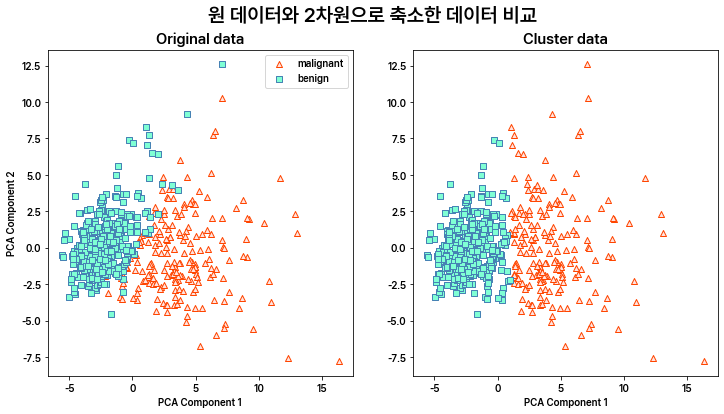

In [89]:
markers = ['^', 's']
colors = ['mistyrose', 'aquamarine']
edgec = ['orangered', 'steelblue']

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
for k, column in enumerate(['target', 'cluster']):
    ax = axs[k]
    for i, marker in enumerate(markers):
        x_axis_data = df[df[column] == i]['PC1']
        y_axis_data = df[df[column] == i]['PC2']
        ax.scatter(x_axis_data, y_axis_data, marker=marker, c=colors[i], edgecolors=edgec[i], label=bc.target_names[i])

    if k == 0:
        ax.set_title('Original data', fontsize=15)
        ax.set_ylabel('PCA Component 2')
        ax.legend()
    else:
        ax.set_title('Cluster data', fontsize=15)
    ax.set_xlabel('PCA Component 1')

plt.suptitle('원 데이터와 2차원으로 축소한 데이터 비교', fontsize=20)
plt.show()

---
>평가

In [66]:
from sklearn.metrics import silhouette_samples, silhouette_score

score_samples = silhouette_samples(bc_std, df.cluster)
df['실루엣 계수'] = score_samples
df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,PC1,PC2,target,cluster,실루엣 계수
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,0.6656,0.7119,0.2654,0.4601,0.11890,9.192837,1.948583,0,0,0.296634
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,0.1866,0.2416,0.1860,0.2750,0.08902,2.387802,-3.768172,0,0,0.041947
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,0.4245,0.4504,0.2430,0.3613,0.08758,5.733896,-1.075174,0,0,0.341336


In [67]:
df['실루엣 계수'].mean()

0.3433822406907782

In [68]:
df.groupby('cluster')[['실루엣 계수']].mean()

,실루엣 계수
cluster,
0,0.136913
1,0.450196


In [69]:
silhouette_score(bc_std, df.cluster)

0.3433822406907781

---